# Twillo analysis

In short, Twillo has wonderful revenue growth until Q3 2023. After that, it's also good but not as amazing. However, since 2022 Q2, their marketing cost to revenue ratio has dropped significantly. This leads to a rising opeerating margin. They may become profitable in a few quarters.

In [56]:
from fmp_data import Dataset

In [61]:
t = Dataset('TWLO', [
    'revenue', 
    'operating_cash_flow', 
    'gross_profit_margin', 
    'operating_expenses', 
    'selling_general_and_administrative_expenses', 
    'selling_and_marketing_expenses', 
    'general_and_administrative_expenses', 
    'operating_profit_margin',
    'research_and_development_expenses'], rename={
        'operating_expenses': 'opex',
        'selling_general_and_administrative_expenses': 'sgas',
        'general_and_administrative_expenses': 'sg&a',
        'selling_and_marketing_expenses': 'marketing',
        'operating_profit_margin': 'op_margin',
        'gross_profit_margin': 'gross_margin',
        'research_and_development_expenses': 'r&d'})

In [62]:
d = pd.DataFrame({'date': t.date, 'rd': t['r&d'] / t.revenue, 'sgas': t['sgas'] / t.revenue, 'sga': t['sg&a'] / t.revenue, 'marketing': t['marketing'] / t.revenue})
d.tail(10)

,date,rd,sgas,sga,marketing
33,2022-06-30,0.296433,0.506262,0.151190,0.355071
34,2022-09-30,0.289650,0.472177,0.137667,0.334510
35,2022-12-31,0.267520,0.411322,0.122095,0.289228
36,2023-03-31,0.237039,0.370024,0.111834,0.258190
37,2023-06-30,0.218640,0.382026,0.129945,0.252081
38,2023-09-30,0.233783,0.364690,0.110355,0.254335
39,2023-12-31,0.219011,0.321177,0.099417,0.221759
40,2024-03-31,0.239239,0.299744,0.106935,0.204401
41,2024-06-30,0.224392,0.295413,0.105297,0.200975
42,2024-09-30,0.230144,0.281327,0.093812,0.187515


2024-11-25 16:56:24 - category.py:223 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-11-25 16:56:24 - category.py:223 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


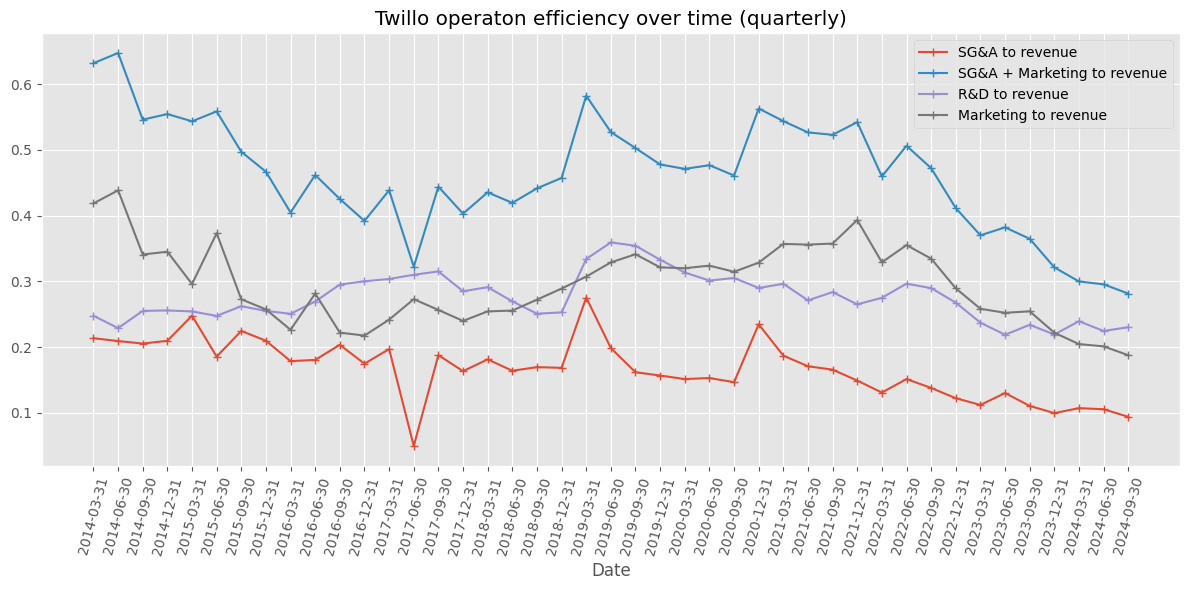

In [63]:
plt.figure(figsize=(12, 6))
plt.title('Twillo operaton efficiency over time (quarterly)')

plt.plot(d.date, d.sga, '+-', label='SG&A to revenue')
plt.plot(d.sgas, '+-', label='SG&A + Marketing to revenue')
plt.plot(d.rd, '+-', label='R&D to revenue')
plt.plot(d.marketing, '+-', label='Marketing to revenue')
plt.xticks(rotation=75)
plt.xlabel('Date')
plt.legend()
plt.tight_layout()

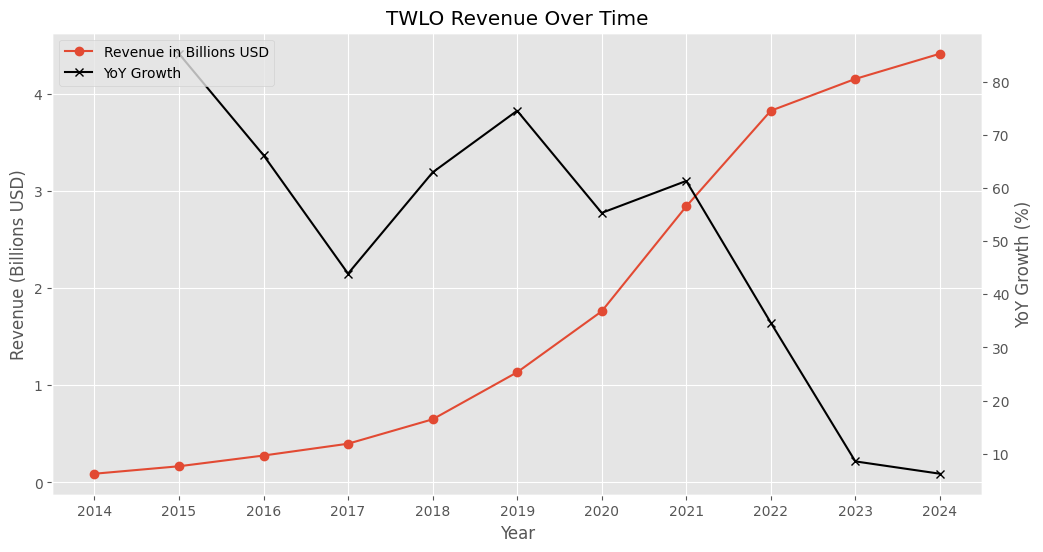

In [116]:

t.data['year'] = pd.to_datetime(t.date).dt.year
yr = t.groupby('year').agg({
    'revenue': 'sum',
}).reset_index()
yr.loc[yr.index[-1], 'revenue'] += 1.15e9 # In Q3 earning call, TWLO reported 1.15 to 1.16B revenue in Q4

# Calculate YoY change percentage
yr['revenue_yoy'] = yr['revenue'].pct_change() * 100

# Format for better readability
yr['revenue_yoy'] = yr['revenue_yoy'].round(2)

fig, ax1 = plt.subplots()
fig.set_size_inches(12, 6)
ax1.plot(yr.year, yr.revenue / 1e9, 'o-', label='Revenue in Billions USD')
ax1.set_xlabel('Year')
ax1.set_ylabel('Revenue (Billions USD)')
ax1.set_xticks(yr.year)
ax1.grid(True)  # Enable grid only on this axis

ax2 = ax1.twinx()
ax2.plot(yr.year, yr.revenue_yoy, 'x-', color='k', label='YoY Growth')
ax2.set_ylabel('YoY Growth (%)')
ax2.grid(False)

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines = lines1 + lines2
labels = labels1 + labels2

plt.title('TWLO Revenue Over Time')
plt.legend(lines, labels, loc='upper left')

In [107]:
yr

,year,revenue,revenue_yoy
0,2014,90108000,NaN
1,2015,166919000,85.24
2,2016,277335000,66.15
3,2017,399020000,43.88
4,2018,650067000,62.92
5,2019,1134468000,74.52
6,2020,1761776000,55.30
7,2021,2841839000,61.31
8,2022,3826321000,34.64
9,2023,4153945000,8.56
